In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [77]:
# Load dataset (Replace 'dataset.csv' with actual file path)
df = pd.read_csv('telesurgery_cybersecurity_dataset.csv')


In [78]:
df

,Robot Gesture ID,Gesture Type,"Gesture Coordinates (x, y, z)",Timestamp,Gesture Duration (sec),Robot Status,Message ID,Sender,Receiver,Encryption Algorithm Used,Encryption Status,Network Latency (ms),Data Transfer Rate (Mbps),Threat Type,Threat Severity,Response Time (sec),Response Action Taken,Threat Detected
0,10,Incision,"(1.48, 1.4, 0.02)",2025-02-14 16:32:27,4.37,Idle,22614,Operator,Robot,Two Fish,Encrypted,11,97,Man-in-the-Middle Attack,Low,4.63,Reset Encryption,1
1,8,Diagnosis,"(1.62, 1.81, 0.68)",2025-02-14 16:32:27,3.08,Idle,61556,Operator,Robot,Two Fish,Encrypted,9,88,DoS Attack,Low,3.94,Reset Encryption,1
2,9,Incision,"(0.67, 1.53, 0.06)",2025-02-14 16:32:27,1.11,Active,27848,Operator,Robot,Two Fish,Encrypted,7,26,No Threat,Low,0.00,None,0
3,1,Incision,"(1.63, 1.74, 1.92)",2025-02-14 16:32:27,2.72,Idle,60592,Operator,Robot,Two Fish,Encrypted,13,56,Data Breach,High,4.58,Reconnect Connection,1
4,4,Suturing,"(0.53, 0.87, 1.17)",2025-02-14 16:32:27,1.20,Idle,46712,Robot,Operator,Two Fish,Failed,5,41,Man-in-the-Middle Attack,Low,2.46,Isolate Data,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,Diagnosis,"(0.48, 1.06, 0.4)",2025-02-14 16:32:27,1.39,Idle,10047,Operator,Robot,Two Fish,Encrypted,7,41,Man-in-the-Middle Attack,High,3.47,Reconnect Connection,1
996,9,Navigation,"(1.81, 0.37, 0.3)",2025-02-14 16:32:27,2.11,Idle,66498,Operator,Robot,Two Fish,Failed,14,26,Data Breach,Medium,3.89,Isolate Data,1
997,9,Navigation,"(1.05, 1.83, 0.49)",2025-02-14 16:32:27,2.09,Idle,69106,Operator,Robot,Two Fish,Failed,8,20,Man-in-the-Middle Attack,High,1.83,Reconnect Connection,1
998,1,Navigation,"(1.56, 0.67, 1.91)",2025-02-14 16:32:27,1.01,Idle,94269,Robot,Operator,Two Fish,Encrypted,8,14,No Threat,Medium,0.00,None,0


In [79]:
# Data Preprocessing: Handling missing values
df.dropna(inplace=True)

In [93]:
df

,Robot Gesture ID,Gesture Type,"Gesture Coordinates (x, y, z)",Timestamp,Gesture Duration (sec),Robot Status,Message ID,Sender,Receiver,Encryption Algorithm Used,Encryption Status,Network Latency (ms),Data Transfer Rate (Mbps),Threat Type,Threat Severity,Response Time (sec),Response Action Taken,Threat Detected
0,10,2,737,0,4.37,1,22614,0,1,0,0,11,97,2,1,4.63,3,1
1,8,1,805,0,3.08,1,61556,0,1,0,0,9,88,1,1,3.94,3,1
2,9,2,320,0,1.11,0,27848,0,1,0,0,7,26,3,1,0.00,1,0
3,1,2,810,0,2.72,1,60592,0,1,0,0,13,56,0,0,4.58,2,1
4,4,4,260,0,1.20,1,46712,1,0,0,1,5,41,2,1,2.46,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,240,0,1.39,1,10047,0,1,0,0,7,41,2,0,3.47,2,1
996,9,3,894,0,2.11,1,66498,0,1,0,1,14,26,0,2,3.89,0,1
997,9,3,513,0,2.09,1,69106,0,1,0,1,8,20,2,0,1.83,2,1
998,1,3,771,0,1.01,1,94269,1,0,0,0,8,14,3,2,0.00,1,0


In [80]:
# Encoding categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [81]:
# Feature Selection (Assuming last column is target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [82]:
# Data Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [94]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [95]:
X_scaled

array([[ 1.57546189, -0.00859811,  0.82272454, ...,  0.04019876,
         1.50775209,  1.41454503],
       [ 0.88249427, -0.72510699,  1.05828357, ...,  0.04019876,
         1.08953985,  1.41454503],
       [ 1.22897808, -0.00859811, -0.62180655, ...,  0.04019876,
        -1.29851263, -0.42611213],
       ...,
       [ 1.22897808,  0.70791077,  0.0467654 , ..., -1.17794551,
        -0.18934104,  0.49421645],
       [-1.54289241,  0.70791077,  0.94050406, ...,  1.25834303,
        -1.29851263, -0.42611213],
       [-0.84992479, -0.72510699, -1.43240673, ...,  0.04019876,
         0.13189444,  0.49421645]])

In [83]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [85]:
# Model Training
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

In [96]:
models

{'Random Forest': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 'SVM': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
     verbose=False)}


Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


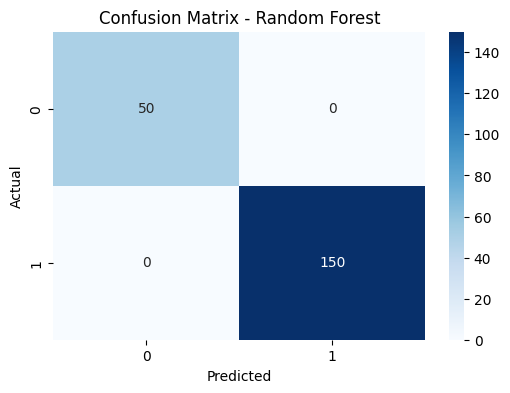


SVM Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


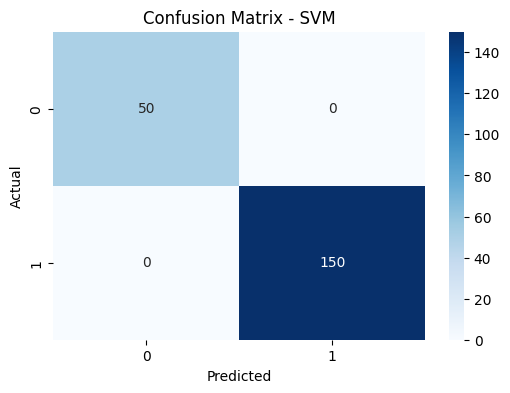

In [101]:
# Visualization
for name, metrics in results.items():
    print(f"\n{name} Performance:")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"{metric}: {value:.4f}")
    
    # Confusion Matrix Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [87]:

# Save results
df_results = pd.DataFrame(results).T.drop(columns=['Confusion Matrix'])
df_results.to_csv('model_performance.csv', index=True)


In [91]:
df_results

,Accuracy,Precision,Recall,F1 Score
Random Forest,1,1,1,1
SVM,1,1,1,1


In [92]:
df_results.to_csv

<bound method NDFrame.to_csv of               Accuracy Precision Recall F1 Score
Random Forest        1         1      1        1
SVM                  1         1      1        1>